In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
review = pd.read_csv('/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/AllReviews.csv')

In [ ]:
review.head(10)

,User Rating,User Review,User Name,Review Date,DateOfReview,FinalText,FinalTextSentimentNegative,FinalTextSentimentPositive,FinalTextSentimentNeutral,FinalTextSentimentCompound,FinalTextSentiment,UserReviewSentimentNegative,UserReviewSentimentPositive,UserReviewSentimentNeutral,UserReviewSentimentCompound,UserReviewSentiment,Topic,TopicLabel
0,5.0,I have quite impressed with the amazing qualit...,Sushant Chaulkar,"Jun, 2019",2019-06-03,I quite impress amazing quality pressure cooke...,0.121,0.440,0.439,0.9236,pos,0.053,0.276,0.670,0.9430,pos,2,Value for Money
1,5.0,Youre Delivery from Flipkart not 5 I will gi...,Patrick Michael,5months ago,2020-03-03,Youre Delivery Flipkart 5 I give 100 Butter fl...,0.000,0.440,0.560,0.8957,pos,0.000,0.289,0.711,0.8957,pos,2,Value for Money
2,4.0,this price is very best for this product and a...,chetan singh,7months ago,2020-01-03,price best product valuable company trust good,0.000,0.818,0.182,0.9260,pos,0.000,0.520,0.480,0.9335,pos,2,Value for Money
3,4.0,it is very nice product so I am happy and exci...,Lokanath Patra,"Jan, 2019",2019-01-03,nice product I happy excite price thank Flipkart,0.000,0.752,0.248,0.9022,pos,0.000,0.479,0.521,0.8991,pos,1,Quality
4,5.0,Nice product. Worth of writing a review. Excel...,Sultan Mustafijul Hoque,"Nov, 2018",2018-11-03,Nice product Worth write review Excellent deli...,0.000,0.548,0.452,0.8720,pos,0.000,0.456,0.544,0.8720,pos,1,Quality
5,5.0,super good work I like that is,Flipkart Customer,10months ago,2019-10-03,super good work I like,0.000,0.823,0.177,0.8519,pos,0.000,0.699,0.301,0.8519,pos,0,Overall Good Product
6,4.0,i bought this to my wife.. she felt very happy...,Nagaraj Govindaraj,7months ago,2020-01-03,buy wife felt happy since cooker handy nice,0.000,0.520,0.480,0.7579,pos,0.000,0.312,0.688,0.7778,pos,1,Quality
7,5.0,good product worth for money pack is also good...,Flipkart Customer,8months ago,2019-12-03,good product worth money pack also good time d...,0.000,0.598,0.402,0.8979,pos,0.000,0.498,0.502,0.8979,pos,2,Value for Money
8,4.0,very nice super product but no SI mark improve...,Ganesh Rk,8months ago,2019-12-03,nice super product SI mark improve quality pac...,0.103,0.658,0.240,0.9531,pos,0.144,0.535,0.322,0.9413,pos,1,Quality
9,5.0,"Good Cooker, I have been using it from 4 month...",Pankaj Tiwari,8months ago,2019-12-03,Good Cooker I use 4 month It good easy clean,0.000,0.655,0.345,0.8860,pos,0.000,0.487,0.513,0.8860,pos,0,Overall Good Product


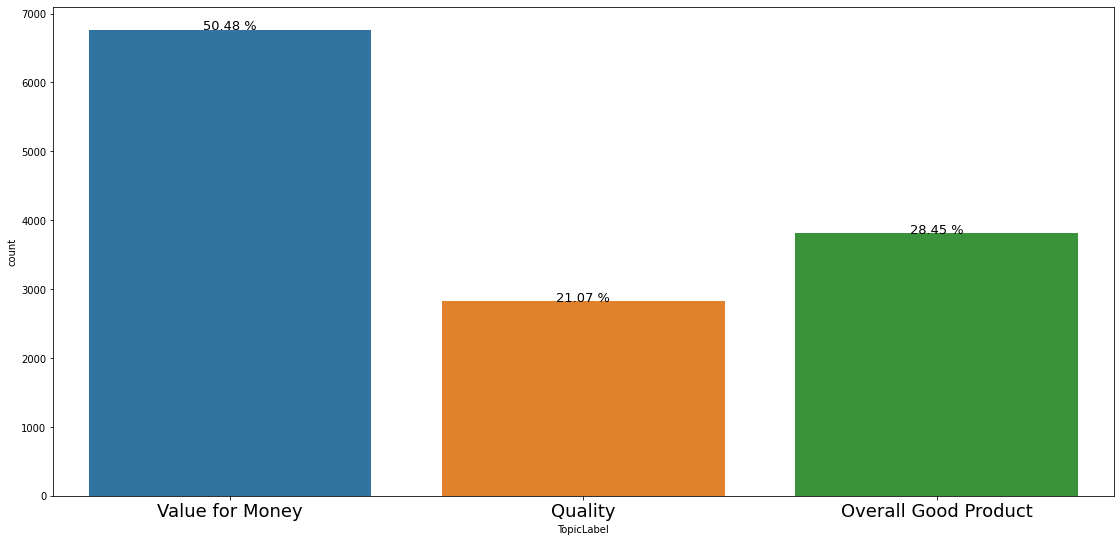

In [ ]:
plt.figure(figsize=(19,9))

fig = sns.countplot(x='TopicLabel',data=review)

total = len(review)

for p in fig.patches:
  height=p.get_height()
  fig.text(p.get_x()+p.get_width()/2,
         height,
         "{0:.2f} %".format(height/total*100),
         ha='center',
         fontsize=13)


plt.xticks(fontsize=18)
plt.show()

In [ ]:
fig = px.scatter(review,x='DateOfReview',y='FinalTextSentimentCompound',color='Topic')

fig.show()

In [ ]:
fig = px.scatter_ternary(review,a='FinalTextSentimentNegative',b='FinalTextSentimentPositive',c='FinalTextSentimentNeutral',size='Topic',color='Topic')

fig.show()

In [ ]:
from wordcloud import WordCloud

def WordCloudMaking(data,col):
    invester = data[col][~pd.isnull(data[col])]

    wordCloud = WordCloud(width=500,height= 300).generate(' '.join(invester))

    plt.figure(figsize=(19,9))

    plt.axis('off')
    plt.title(data[col].name,fontsize=20)
    plt.imshow(wordCloud)
    plt.show()

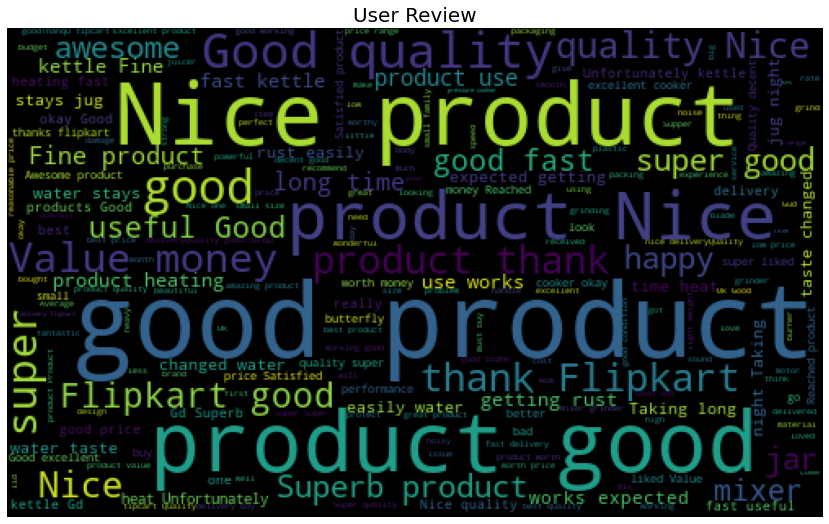

In [ ]:
WordCloudMaking(review,'User Review')

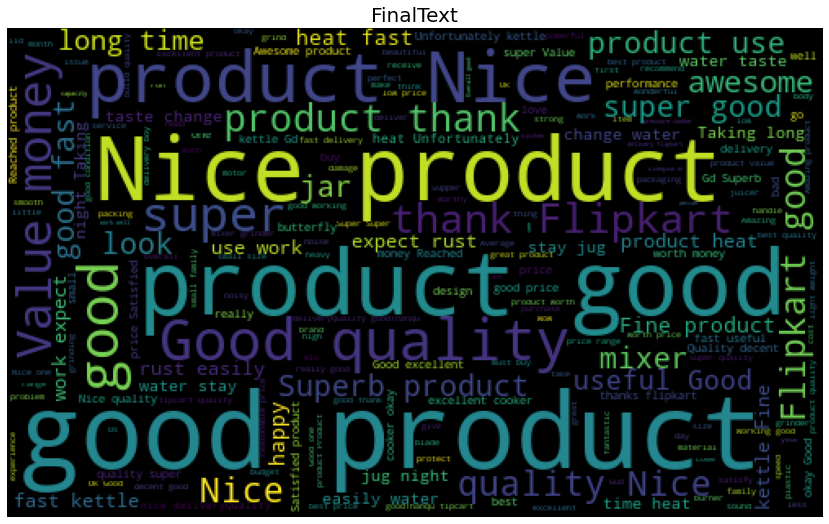

In [ ]:
WordCloudMaking(review,'FinalText')

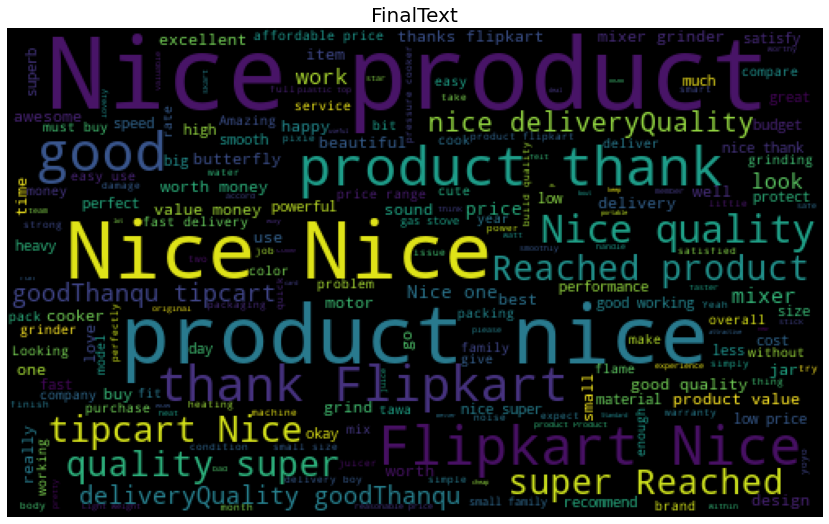

In [ ]:
WordCloudMaking(review[review['Topic']==1],'FinalText') # Overall Product Review

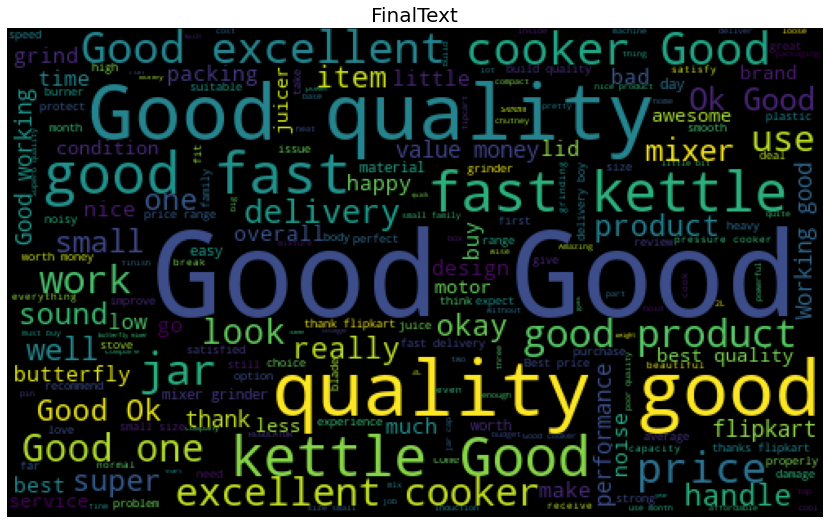

In [ ]:
WordCloudMaking(review[review['Topic']==0],'FinalText') # Quality

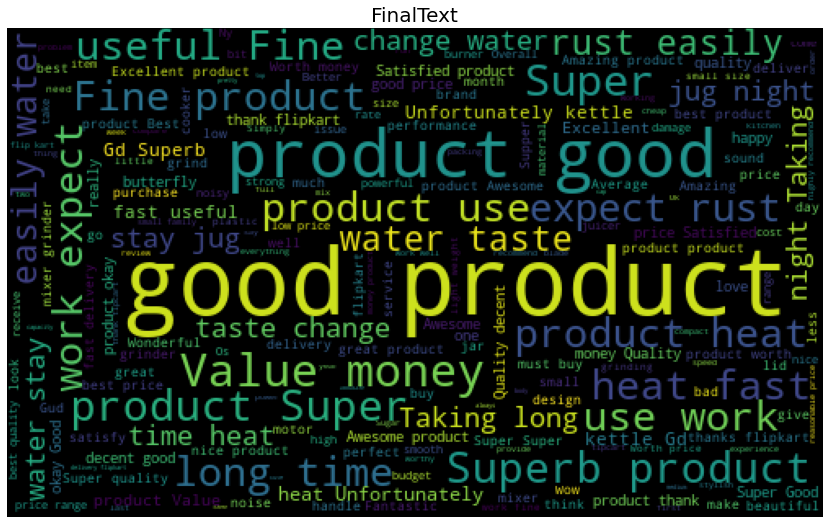

In [ ]:
WordCloudMaking(review[review['Topic']==2],'FinalText') # Value For money